In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [13]:
data = pd.read_csv("/Users/cristiangiraldo/Documents/Universidad - Ingenieria de Sistemas/Semestre II 2023/Materias/Analisis de Datos/Entregable 2/Regresion Logistica/framingham.csv", sep=",")

# Reemplazar valores faltantes (NA) con el promedio de la columna
data['glucose'].fillna(data['glucose'].mean(), inplace=True)

# Dividir los datos en características (X) y la variable objetivo (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador que reemplace los NaN con el promedio de la columna
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar las características para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del Modelo:")
print(accuracy_score(y_test, y_pred))



Matriz de Confusión:
[[718   6]
 [115   9]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848


Precisión del Modelo:
0.8573113207547169


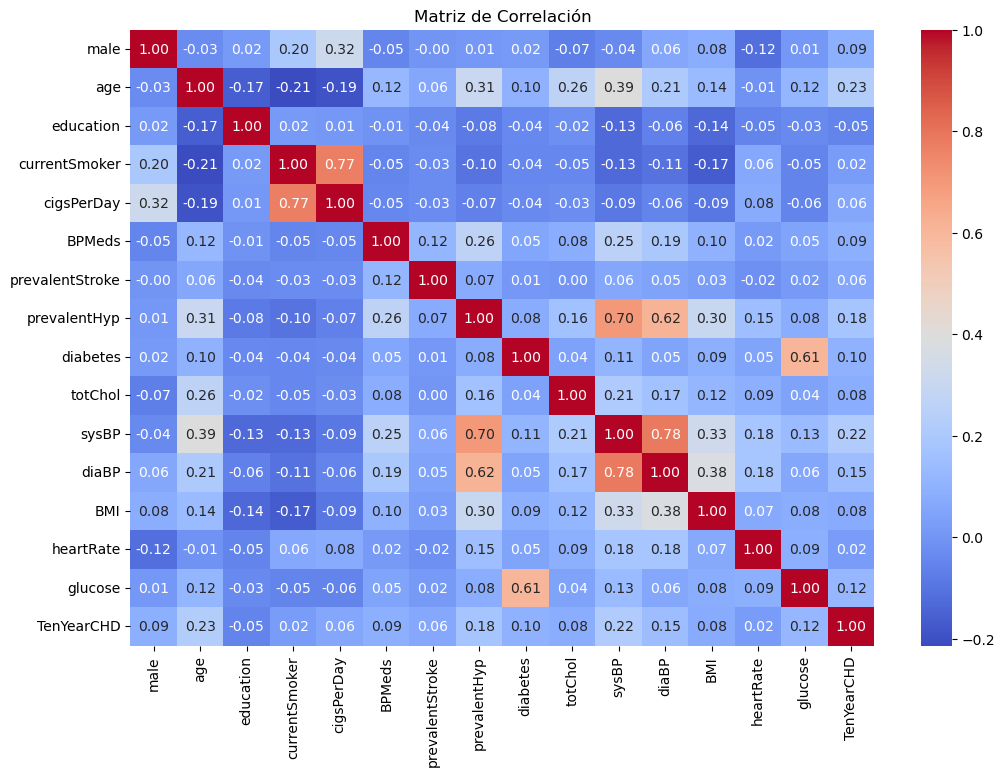

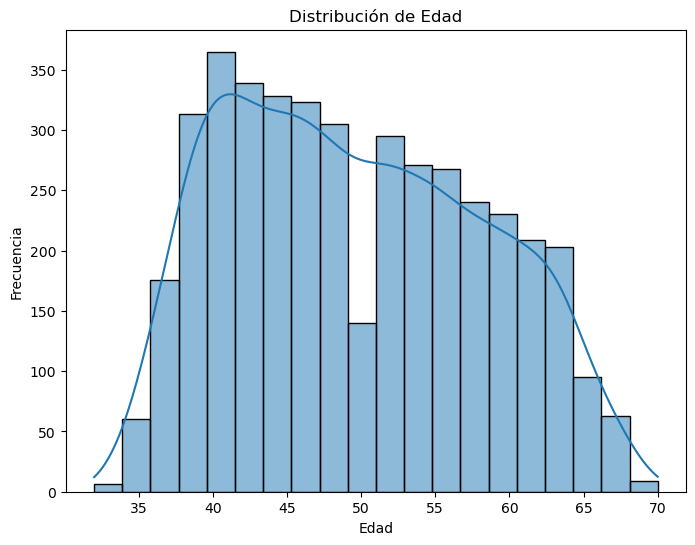

In [16]:
# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Graficar un histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

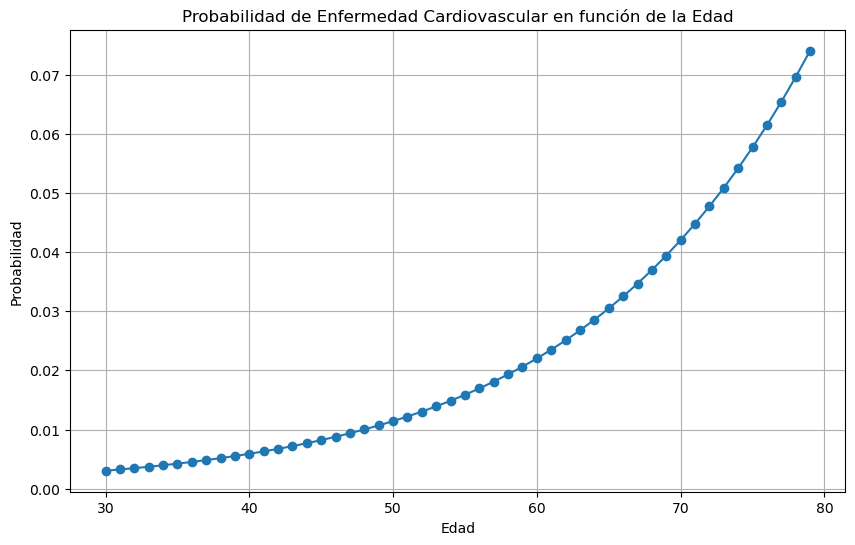

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Rango de edades para las cuales deseamos calcular las probabilidades
age_range = np.arange(30, 80, 1)

# Crear un conjunto de datos ficticio con todas las características excepto 'edad'
X_ficticio = np.zeros((len(age_range), X_train.shape[1]))
X_ficticio[:, :] = X_train[0, :]  # Rellenar el conjunto ficticio con un ejemplo de tus datos de entrenamiento
X_ficticio[:, 1] = age_range  # Reemplazar la 'edad' con los valores en el rango

# Escalar el conjunto ficticio utilizando el mismo escalador que usaste en los datos de prueba
X_ficticio = scaler.transform(X_ficticio)

# Calcular las probabilidades para el conjunto ficticio
probs_age = model.predict_proba(X_ficticio)[:, 1]

# Graficar las probabilidades en función de la edad
plt.figure(figsize=(10, 6))
plt.plot(age_range, probs_age, marker='o', linestyle='-')
plt.title('Probabilidad de Enfermedad Cardiovascular en función de la Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad')
plt.grid()
plt.show()